<p style="text-align:center;"><span style="font-size:80px;"><span style="color:navy"><span style="font-family:cursive;"><span style="font-weight:1000">Hi Everybody 👋</span></span></span></span></p>

<a id="content"></a>    
<div style="border-radius:20px; padding: 15px; background-color: #f0f2fa; font-size:100%; text-align:left">

<h2><span style="text-align:center; font-weight:bolder; color:navy">Table of Contents:</span></h2>

 * **[Step 1 | Nessesary Libraries](#setup)**
    -  [1.1 | Import Libraries](#import)
    -  [1.2 | Library configurations](#lib_config)
 *  **[Step 2 | Data](#data)**
    -  [2.1 | Collecting Data](#load_data)
    -  [2.2 | Data Information](#info)
 *  **[Step 3 | Data Wrangling](#data_wrangling)**
    -  [3.1 | Normal Rnages](#normal_range)
    -  [3.2 | Visualization and Plots](#plot)
    -  [3.3 | Missing Values](#missing)
 *  **[Step 4 | Macine Learning](#ml)**
    -  [4.1 | Initializations](#init)
    -  [4.2 | Normalization](#normalize)
    -  [4.3 | LogisticRegression](#lr)
    -  [4.4 | DecisionTreeClassifier](#tree)
    -  [4.5 | KNeighborsClassifier](#knn)
    -  [4.6 | RandomForestClassifier](#rf)
    -  [4.7 | result](#result)
 *  **[Author](#author)**

<a id="setup"></a>
# <p style="padding:15px;background-color:navy ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Step 1 | Nessasary Libraries</p>

## 🔝 [Go to Top](#content) 🔝

<a id="import"></a>
# <b><span style="color:#0266b7">Step 1.1 | </span><span style="color:#ff6200">Import Libraries</span></b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

################### Sklearn ####################################

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

<a id="import"></a>
# <b><span style="color:#0266b7">Step 1.2 | </span><span style="color:#ff6200">Library configurations</span></b>

In [2]:
pd.options.mode.copy_on_write = True # Allow re-write on variable

sns.set_style('darkgrid') # Seaborn style

warnings.filterwarnings('ignore') # Ignore warnings

pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe

pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

<a id="data"></a>
# <p style="padding:15px;background-color:navy ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Step 2 | Data</p>
### 🔝 [Tabel of Contents](#content)

<a id="load_data"></a>
# <b><span style="color:#0266b7">Step 2.1 | </span><span style="color:#ff6200">Collecting Data</span></b>

In [3]:
data = pd.read_csv("kidney-stone-dataset.csv")
data

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021000,4.910000,725,14.000000,443,2.450000,0
1,1,1.017000,5.740000,577,20.000000,296,4.490000,0
2,2,1.008000,7.200000,321,14.900000,101,2.360000,0
3,3,1.011000,5.510000,408,12.600000,224,2.150000,0
4,4,1.005000,6.520000,187,7.500000,91,1.160000,0
...,...,...,...,...,...,...,...,...
85,85,1.021452,5.556081,756,24.241481,367,7.669120,1
86,86,1.016501,6.900257,549,20.549790,204,5.775256,1
87,87,1.032754,5.443491,1085,23.188653,576,8.664169,1
88,88,1.023870,5.106433,325,12.124689,50,0.781620,1


<a id="info"></a>
# <b><span style="color:#0266b7">Step 2.2 | </span><span style="color:#ff6200">Data Information</span></b>

In [4]:
data.drop(columns='Unnamed: 0', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  90 non-null     float64
 1   ph       90 non-null     float64
 2   osmo     90 non-null     int64  
 3   cond     90 non-null     float64
 4   urea     90 non-null     int64  
 5   calc     90 non-null     float64
 6   target   90 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 5.1 KB


In [5]:
data.describe(include='all')

,gravity,ph,osmo,cond,urea,calc,target
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.017952,6.036651,602.333333,20.621687,258.200000,4.017788,0.500000
std,0.006780,0.711801,238.459805,7.654448,135.381127,3.016273,0.502801
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012258,5.536520,411.500000,14.150000,148.250000,1.412500,0.000000
50%,1.018000,5.936247,572.000000,21.177172,231.500000,3.230000,0.500000
75%,1.023000,6.490000,778.000000,26.075000,366.250000,5.965127,1.000000
max,1.034000,7.940000,1236.000000,38.000000,620.000000,13.000000,1.000000


In [6]:
print(data.columns)

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')


<a id="data_wrangling"></a>
# <p style="padding:15px;background-color:navy ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Step 3 | Data Wrangling</p>
### 🔝 [Tabel of Contents](#content)

<a id="normal_range"></a>
# <b><span style="color:#0266b7">Step 3.1 | </span><span style="color:#ff6200">Normal Ranges</span></b>

| Element | Normal Rnage |
|---------|--------------|
| Gravity | 1.005 - 1.030 |
| PH | 4.5 - 8 |
| Osmolality | 50 - 1200 |
| Conductivity | 1 - 34 |
| Urea | 70 - 210 |
| Calcium | 5 - 20 |

In [7]:
normal_range = {
    'gravity' : [1.005, 1.030],
    'ph' : [4.5, 8],
    'osmo' : [50, 1200],
    'cond' : [1, 34],
    'urea' : [70, 210],
    'calc' : [5, 20]
}
normal_range

{'gravity': [1.005, 1.03],
 'ph': [4.5, 8],
 'osmo': [50, 1200],
 'cond': [1, 34],
 'urea': [70, 210],
 'calc': [5, 20]}

In [8]:
cols = list(data.columns)
cols.pop(-1)
print('Columns : ', cols)
y = data.target

Columns :  ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']


<a id="plot"></a>
# <b><span style="color:#0266b7">Step 3.2 | </span><span style="color:#ff6200">Visualization and Plots</span></b>

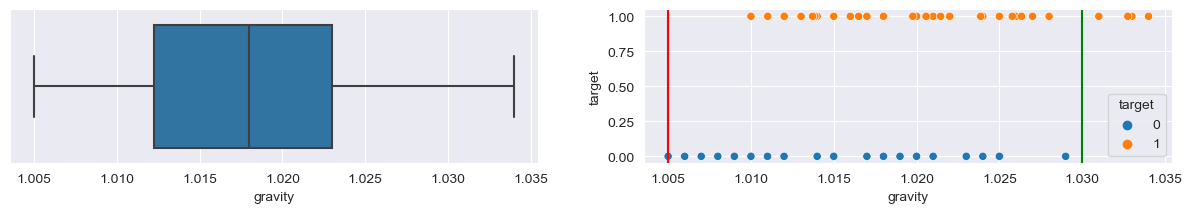

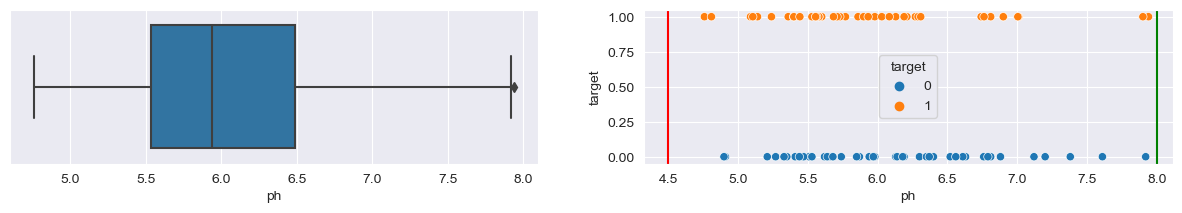

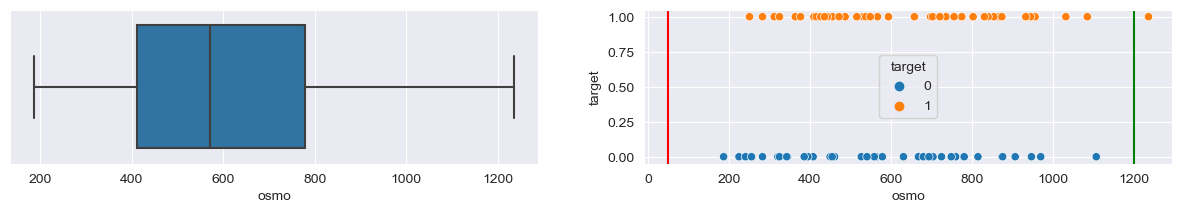

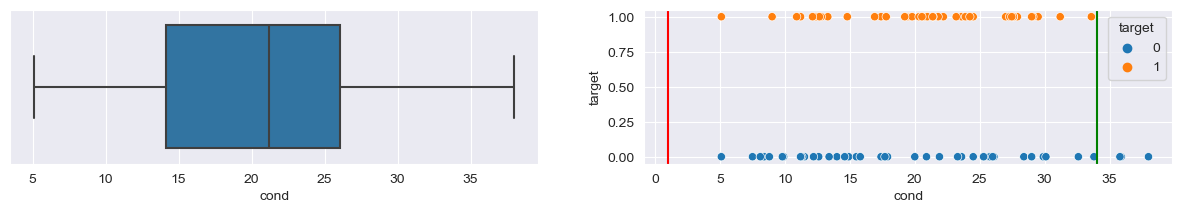

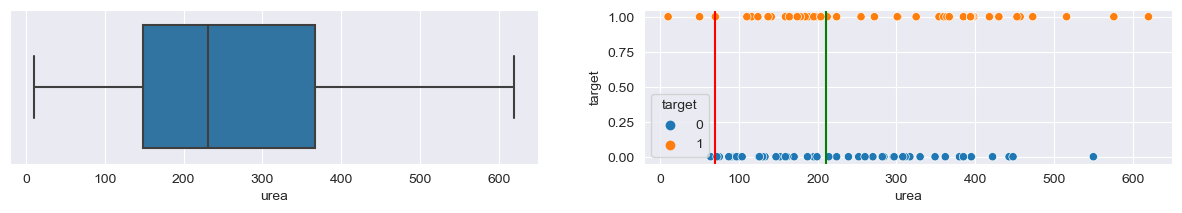

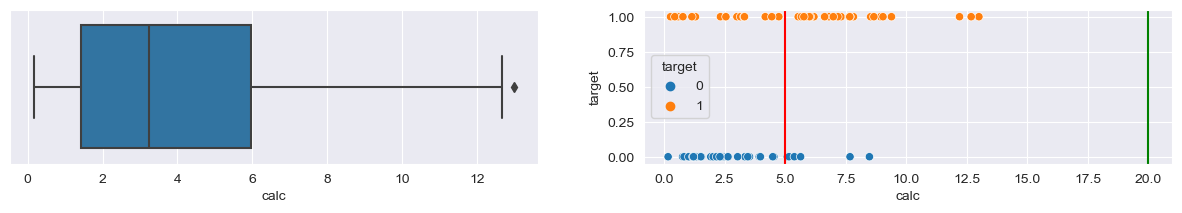

In [9]:
for feature in cols:
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    
    sns.boxplot(x=feature, data=data, ax=ax[0])
    
    sns.scatterplot(x=feature, y=data.target, data=data, ax=ax[1], hue='target')
    plt.axvline(normal_range[feature][0], color='red')
    plt.axvline(normal_range[feature][1], color='green')

<h4>We have no noise in data</h4>

<a id="missig"></a>
# <b><span style="color:#0266b7">Step 3.3 | </span><span style="color:#ff6200">Missing Values</span></b>

In [10]:
data.isna().sum().sum()

0

<h4>We have no missing values(Nan)</h4>

<a id="ml"></a>
# <p style="padding:15px;background-color:navy ;margin:0;color:#ffffff;font-family:Chalkduster;font-size:75%;text-align:center;border-radius: 75px 75px;font-weight:700; box-shadow: 10px 10px 5px #32409c">Step 4 | Machine Learning</p>
### 🔝 [Tabel of Contents](#content)

<a id="missig"></a>
# <b><span style="color:#0266b7">Step 4.1 | </span><span style="color:#ff6200"> Initializatios </span></b>

In [11]:
X = data.drop(columns='target')
y = data.target.values.reshape(-1, 1)
features = X.columns

In [12]:
# Define a function to plot Confusion Matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap="Blues"); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Have not', 'Have']); ax.yaxis.set_ticklabels(['Have not', 'Have']) 
    plt.show() 

<a id="normalize"></a>
# <b><span style="color:#0266b7">Step 4.2 | </span><span style="color:#ff6200">Nornalization</span></b>

In [13]:
scaler = preprocessing.MinMaxScaler(feature_range=(2, 3))
df_0 = scaler.fit_transform(X)
df = pd.DataFrame(df_0, columns=features)

<a id="lr"></a>
# <b><span style="color:#0266b7">Step 4.3 | </span><span style="color:#ff6200"> LogisticRegression </span></b>

In [14]:
parameters ={'C':[0.01,0.1,1,10],
             'penalty':['l2', 'l1'],
             'solver':['lbfgs', 'liblinear', 'saga']}

tester = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
best_score = 0
best_t = 0
best_hyper_param = {}

for t in tester :
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=t, random_state=0)
    lr=LogisticRegression()
    logreg_cv = GridSearchCV(estimator=lr, cv=10, param_grid=parameters).fit(X_train, y_train)
    yhat=logreg_cv.predict(X_test)
    score = metrics.accuracy_score(y_test, yhat)
    if score >  best_score :
        best_score = score
        best_t = t
        best_hyper_param = logreg_cv.best_params_
print(best_t)
print(best_hyper_param)
print(best_score)

0.25
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.782608695652174


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=best_t, random_state=0)
lr=LogisticRegression(**best_hyper_param).fit(X_train, y_train)
yhat=lr.predict(X_test)
logreg_score = lr.score(X_test, y_test)
print(logreg_score)

0.782608695652174


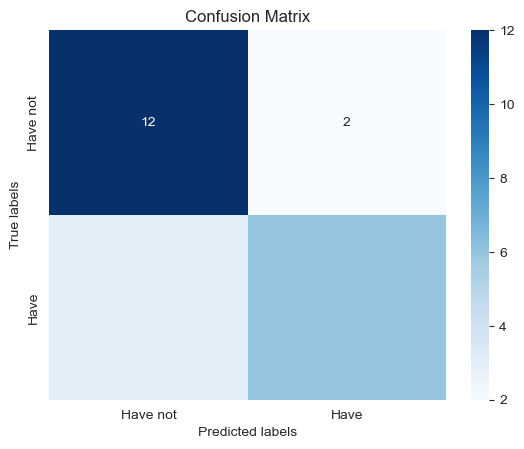

In [16]:
plot_confusion_matrix(y_test,yhat)

<div style="border-radius:10px; padding: 15px; background-color: #f0f2fa; font-size:150%; text-align:left; font-weight:500">
<span>Logistic Regression </b> Accuracy: <b>0.7826 or 78.26%</b></span>
</div>

<a id="tree"></a>
# <b><span style="color:#0266b7">Step 4.4 | </span><span style="color:#ff6200"> DecisionTreeClassifier </span></b>

In [17]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tester = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
best_score = 0
best_t = 0
best_hyper_param = {}

for t in tester :
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=t, random_state=0)
    tree = DecisionTreeClassifier()S
    tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)
    yhat = tree_cv.predict(X_test)
    score = metrics.accuracy_score(y_test, yhat)
    if score >  best_score :
        best_score = score
        best_t = t
        best_hyper_param = tree_cv.best_params_
print(best_t)
print(best_hyper_param)
print(best_score)

0.1
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
0.7777777777777778


In [18]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=best_t, random_state=0)
tree = DecisionTreeClassifier(**best_hyper_param).fit(X_train, y_train)
yhat = tree.predict(X_test)
tree_cv_score = tree.score(X_test, y_test)
print(tree_cv_score)

0.6666666666666666


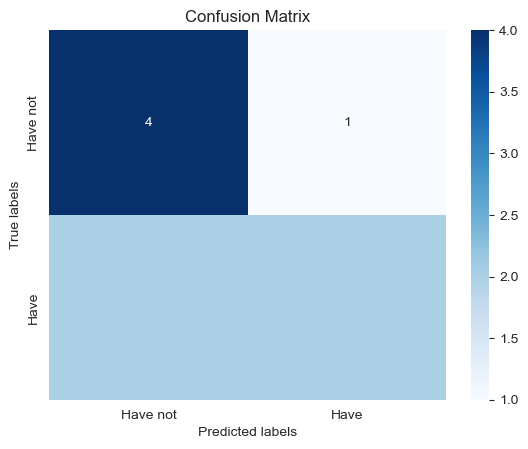

In [19]:
plot_confusion_matrix(y_test,yhat)

<div style="border-radius:10px; padding: 15px; background-color: #f0f2fa; font-size:150%; text-align:left; font-weight:500">
<span>Decision Tree Classifier </b> Accuracy: <b>0.6667 or 66.67%</b></span>
</div>

<a id="knn"></a>
# <b><span style="color:#0266b7">Step 4.5 | </span><span style="color:#ff6200"> KNeighborsClassifier </span></b>

In [20]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

tester = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
best_score = 0
best_t = 0
best_hyper_param = {}

for t in tester :
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=t, random_state=0)
    KNN = KNeighborsClassifier()
    knn_cv = GridSearchCV(estimator=KNN, cv=10, param_grid=parameters).fit(X_train, y_train)
    yhat = knn_cv.predict(X_test)
    score = metrics.accuracy_score(y_test, yhat)
    if score >  best_score :
        best_score = score
        best_t = t
        best_hyper_param = knn_cv.best_params_
print(best_t)
print(best_hyper_param)
print(best_score)

0.1
{'algorithm': 'auto', 'n_neighbors': 4, 'p': 2}
0.7777777777777778


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=best_t, random_state=0)
KNN = KNeighborsClassifier(**best_hyper_param).fit(X_train, y_train)
yhat = KNN.predict(X_test)
knn_cv_score = metrics.accuracy_score(y_test, yhat)
print(score)

0.6875


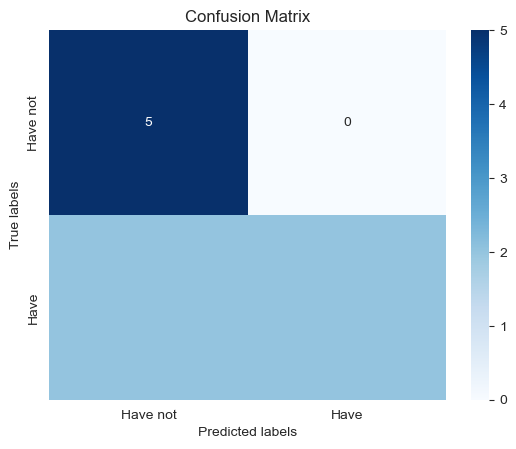

In [22]:
plot_confusion_matrix(y_test,yhat)

<div style="border-radius:10px; padding: 15px; background-color: #f0f2fa; font-size:150%; text-align:left; font-weight:500">
<span>KNeighbors Classifier </b> Accuracy: <b>0.7778 or 77.78%</b></span>
</div>

<a id="rf"></a>
# <b><span style="color:#0266b7">Step 4.6 | </span><span style="color:#ff6200"> RandomForestClassifier </span></b>

In [23]:
parameters = {
     'n_estimators' : [1000],
     'criterion': ['gini', 'entropy'],
     'max_depth': [10, 18, 20],
     'max_features': ['sqrt']}

tester = [0.1, 0.2, 0.3]
best_score = 0
best_t = 0
best_hyper_param = {}

for t in tester :
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=t, random_state=0)
    rf = RandomForestClassifier()
    rf_cv = GridSearchCV(estimator=rf, cv=10, param_grid=parameters).fit(X_train, y_train)
    yhat = rf_cv.predict(X_test)
    score = metrics.accuracy_score(y_test, yhat)
    if score >  best_score :
        best_score = score
        best_t = t
        best_hyper_param = rf_cv.best_params_
print(best_t)
print(best_hyper_param)
print(best_score)

0.1
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'n_estimators': 1000}
0.8888888888888888


In [24]:
best_hyper_param

{'criterion': 'entropy',
 'max_depth': 18,
 'max_features': 'sqrt',
 'n_estimators': 1000}

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=best_t, random_state=0)
rf = RandomForestClassifier(**best_hyper_param).fit(X_train, y_train)
yhat = rf.predict(X_test)
rf_cv_score = metrics.accuracy_score(y_test, yhat)
print(rf_cv_score)

0.8888888888888888


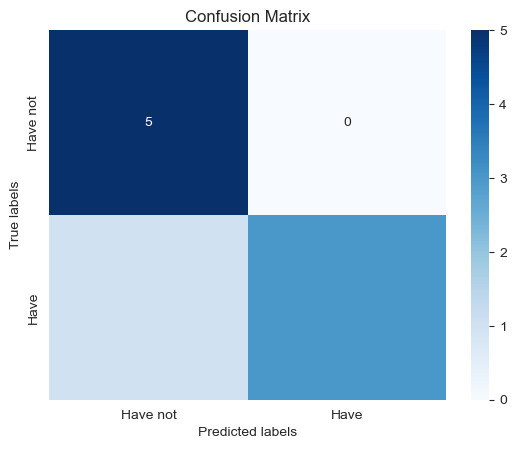

In [26]:
plot_confusion_matrix(y_test,yhat)

<div style="border-radius:10px; padding: 15px; background-color: #f0f2fa; font-size:150%; text-align:left; font-weight:500">
<span>Random Forest Classifier </b> Accuracy: <b>0.8889 or 88.89%</b></span>
</div>

<a id="result"></a>
# <b><span style="color:#0266b7">Step 4.7 | </span><span style="color:#ff6200"> Result </span></b>

In [27]:
result = pd.DataFrame({
    'Algorithm' : ['LogisticRegression', 'DecisionTree', 'KNeighborsClassifier', 'RandomForestClassifier'],
    'Accuracy' : [logreg_score, tree_cv_score, knn_cv_score, rf_cv_score]
})
result

,Algorithm,Accuracy
0,LogisticRegression,0.782609
1,DecisionTree,0.666667
2,KNeighborsClassifier,0.777778
3,RandomForestClassifier,0.888889


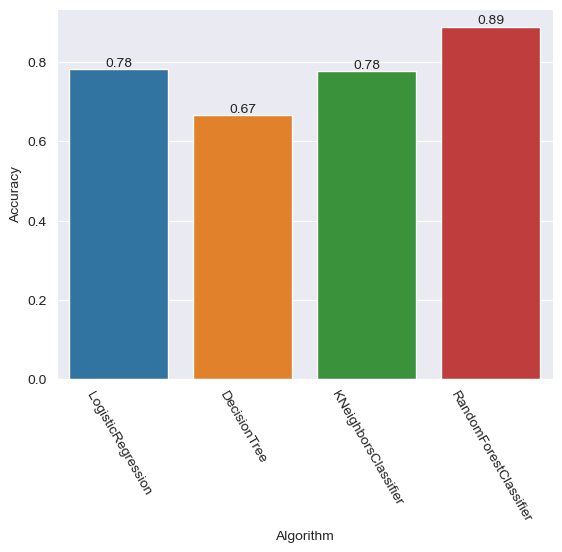

In [28]:
# Create a barplot
ax = sns.barplot(x=result.Algorithm, y=result.Accuracy)
plt.xticks(rotation=300)
# Add values with custom formatting
for i, v in enumerate(result.Accuracy):
   ax.text(i, v+0.01*v, str(round(v, 2)), ha='center')

<div style="border-radius:10px; padding: 15px; background-color: #f0f2fa; font-size:150%; text-align:left; font-weight:500">
<span>Best Algorithm is <b>RandomForestClassifier </b> with Accuracy : <b>89%</b></span>
</div>

## <p style="text-align:center; font-size:150%">🔝 [Go to Top](#content) 🔝 </p>